In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pprint import pprint

In [2]:
# Read CSV into a DataFrame
wine_df = pd.read_csv('winemag-data-130k-v2.csv')


In [3]:
# Checking for null values on the column level
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
#Drop unnecessary columns
wine_df = wine_df.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle','designation'], axis=1)

In [5]:
#check revised dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [6]:
#Check type of entries for price
wine_df['price'].unique()

array([  nan,   15.,   14.,   13.,   65.,   16.,   24.,   12.,   27.,
         19.,   30.,   34.,   28.,   32.,   23.,   20.,   22.,   35.,
         69.,   10.,   17.,   50.,   21.,   11.,    9.,   40.,   55.,
        100.,   25.,   58.,   26.,   46.,   75.,   18.,   29.,   85.,
         44.,   80.,   70.,   36.,   39.,   45.,   48.,   68.,   78.,
         60.,  112.,   84.,   64.,   38.,   95.,   62.,   57.,   49.,
         37.,   52.,   41.,  215.,  125.,   56.,    7.,   42.,  350.,
        775.,  225.,  150.,  320.,  630.,  365.,   66.,  110.,  200.,
        380.,  160.,   89.,   54.,  115.,   73.,   72.,  130.,   88.,
         59.,   90.,   53.,   43.,  120.,    8.,  102.,   33.,  105.,
        101.,  117.,  175.,  180.,   98.,   47.,   31.,   86.,  135.,
        154.,  132.,   71.,   92.,   94., 1900.,  170.,  220., 1100.,
         82.,  280., 1200.,  195., 1300.,  400.,  163.,    6.,  126.,
         63.,   74.,  300.,  270.,    4.,   76.,   79.,  107.,  106.,
        260.,   96.,

In [7]:
# Drop rows where 'price' is NaN
wine_df = wine_df.dropna(subset=['price'])

#check NaN rows were dropped
wine_df['price'].unique()

array([  15.,   14.,   13.,   65.,   16.,   24.,   12.,   27.,   19.,
         30.,   34.,   28.,   32.,   23.,   20.,   22.,   35.,   69.,
         10.,   17.,   50.,   21.,   11.,    9.,   40.,   55.,  100.,
         25.,   58.,   26.,   46.,   75.,   18.,   29.,   85.,   44.,
         80.,   70.,   36.,   39.,   45.,   48.,   68.,   78.,   60.,
        112.,   84.,   64.,   38.,   95.,   62.,   57.,   49.,   37.,
         52.,   41.,  215.,  125.,   56.,    7.,   42.,  350.,  775.,
        225.,  150.,  320.,  630.,  365.,   66.,  110.,  200.,  380.,
        160.,   89.,   54.,  115.,   73.,   72.,  130.,   88.,   59.,
         90.,   53.,   43.,  120.,    8.,  102.,   33.,  105.,  101.,
        117.,  175.,  180.,   98.,   47.,   31.,   86.,  135.,  154.,
        132.,   71.,   92.,   94., 1900.,  170.,  220., 1100.,   82.,
        280., 1200.,  195., 1300.,  400.,  163.,    6.,  126.,   63.,
         74.,  300.,  270.,    4.,   76.,   79.,  107.,  106.,  260.,
         96.,    5.,

In [8]:
#check count for price after drop
wine_df['price'].count()

120975

In [9]:
#Delete the decimal by converting to integer
wine_df['price'] = wine_df['price'].astype(int)
wine_df['price'].unique()

array([  15,   14,   13,   65,   16,   24,   12,   27,   19,   30,   34,
         28,   32,   23,   20,   22,   35,   69,   10,   17,   50,   21,
         11,    9,   40,   55,  100,   25,   58,   26,   46,   75,   18,
         29,   85,   44,   80,   70,   36,   39,   45,   48,   68,   78,
         60,  112,   84,   64,   38,   95,   62,   57,   49,   37,   52,
         41,  215,  125,   56,    7,   42,  350,  775,  225,  150,  320,
        630,  365,   66,  110,  200,  380,  160,   89,   54,  115,   73,
         72,  130,   88,   59,   90,   53,   43,  120,    8,  102,   33,
        105,  101,  117,  175,  180,   98,   47,   31,   86,  135,  154,
        132,   71,   92,   94, 1900,  170,  220, 1100,   82,  280, 1200,
        195, 1300,  400,  163,    6,  126,   63,   74,  300,  270,    4,
         76,   79,  107,  106,  260,   96,    5,  164,  190,  205,  145,
         67,  140,  210,  161,  155,  146,  230,   51,   61,  104,  148,
        209,   99,  430,  550,  475,  235,  165,  3

In [10]:
#Check type of entries for region
wine_df['region_1'].unique()

array([nan, 'Willamette Valley', 'Lake Michigan Shore', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [11]:
# Replace blank strings with NaN
wine_df['region_1'] = wine_df['region_1'].replace('', np.nan)

# Drop rows where 'region_1' is NaN
wine_df = wine_df.dropna(subset=['region_1'])

#check NaN rows were dropped
wine_df['region_1'].unique()

array(['Willamette Valley', 'Lake Michigan Shore', 'Navarra', ...,
       'Del Veneto', 'Bardolino Superiore', 'Paestum'], dtype=object)

In [12]:
# Rename 'region_1' to 'region'
wine_df.rename(columns={'region_1': 'region'}, inplace=True)

In [13]:
# Check count
wine_df['region'].count()

101400

In [14]:
#check out the points values
wine_df['points'].value_counts()

points
88     13533
87     13302
90     11936
86      9663
89      9264
91      8938
92      7584
85      7222
93      5144
84      5025
94      3051
83      2394
82      1510
95      1223
81       572
96       422
80       327
97       182
98        65
99        26
100       17
Name: count, dtype: int64

In [15]:
# Creating categories based on the Wine Spectator's 100-point Scale (https://www.winespectator.com/articles/scoring-scale)
# based on below 
# 95-100 Classic: a great wine
# 90-94 Outstanding: a wine of superior character and style
# 85-89 Very good: a wine with special qualities
# 80-84 Good: a solid, well-made wine
# 75-79 Mediocre: a drinkable wine that may have minor flaws
# 50-74 Not recommended

# Define bin edges and labels
bins = [50, 74, 79, 84, 89, 94, 100]  # 7 edges, defines 6 bins
short_labels = [
    'Not recommended',
    'Mediocre',
    'Good',
    'Very good',
    'Outstanding',
    'Classic'
]  # 6 labels

# Ensure the number of labels is one fewer than the number of bins
assert len(short_labels) == len(bins) - 1, "Labels must be one fewer than the number of bins."

# Create the 'rating_category' column with proper bins and labels
wine_df['rating_category'] = pd.cut(wine_df['points'], bins=bins, labels=short_labels, include_lowest=True)

# Check the new DataFrame to ensure proper categorization
#print(wine_df).head()  # Display the first few rows

In [16]:
#checking how many are in each rating category
wine_df['rating_category'].value_counts()

rating_category
Very good          52984
Outstanding        36653
Good                9828
Classic             1935
Not recommended        0
Mediocre               0
Name: count, dtype: int64

In [17]:
wine_df['variety'].info()

<class 'pandas.core.series.Series'>
Index: 101400 entries, 2 to 129970
Series name: variety
Non-Null Count   Dtype 
--------------   ----- 
101400 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [18]:
# Drop rows where 'variety' is NaN
clean_variety_counts = wine_df.dropna(subset=['variety'])

#check NaN rows were dropped
clean_variety_counts['variety'].info()

<class 'pandas.core.series.Series'>
Index: 101400 entries, 2 to 129970
Series name: variety
Non-Null Count   Dtype 
--------------   ----- 
101400 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [19]:
# Get the value counts for 'variety'
variety_counts = wine_df['variety'].value_counts()
variety_counts

variety
Pinot Noir                  11693
Chardonnay                  10070
Cabernet Sauvignon           8284
Red Blend                    7537
Bordeaux-style Red Blend     5123
                            ...  
Verdosilla                      1
Muscat of Alexandria            1
Molinara                        1
Paralleda                       1
Alvarinho                       1
Name: count, Length: 509, dtype: int64

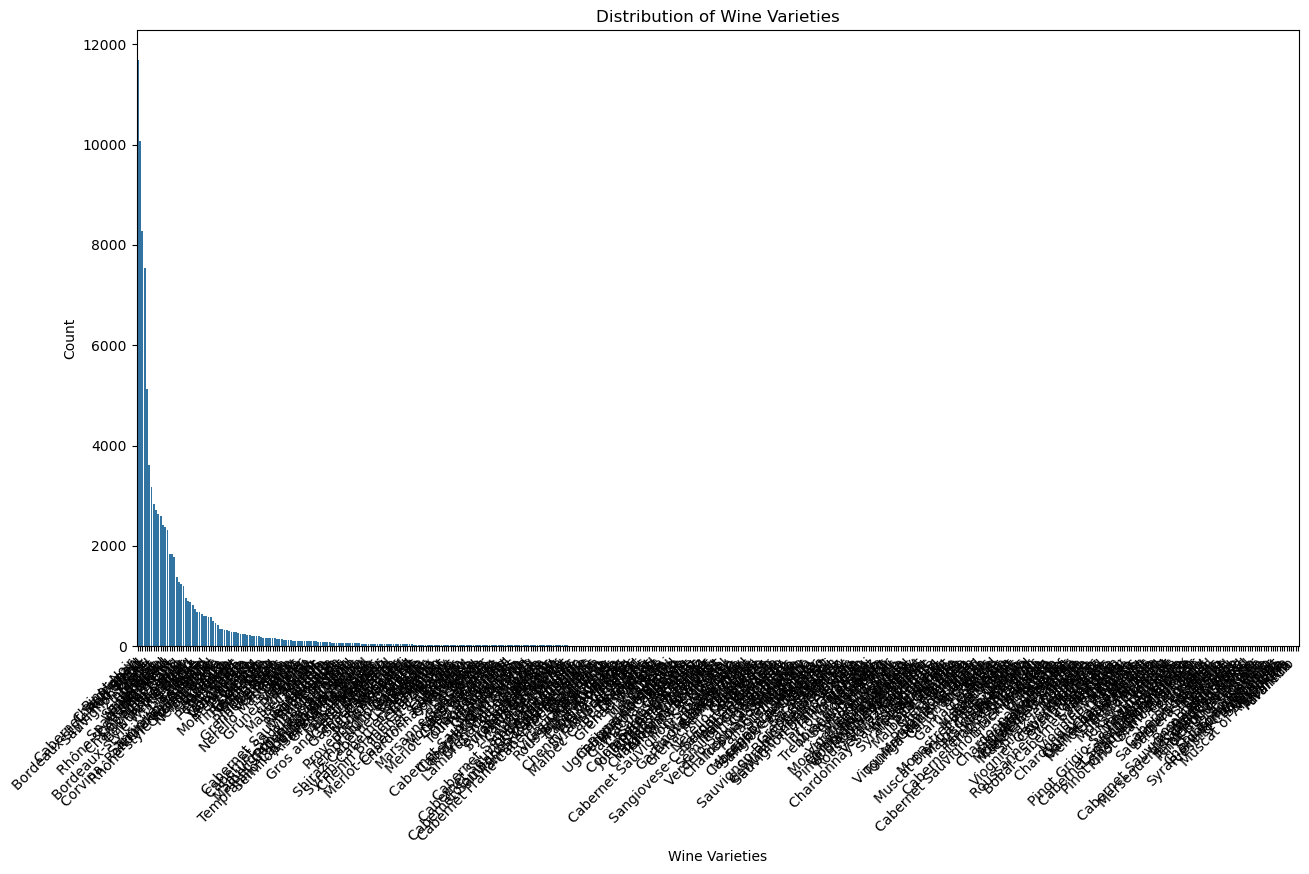

In [26]:
# Create a bar plot to show distribution of varieties
plt.figure(figsize=(15, 8))  # Adjust the size for better visibility
sns.barplot(x=variety_counts.index, y=variety_counts.values)

# Add labels and title
plt.xlabel("Wine Varieties")
plt.ylabel("Count")
plt.title("Distribution of Wine Varieties")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotates labels for long text

# Show the plot
plt.show()

In [27]:
#Only keeping the top 20 varieties
top_20_variety = variety_counts.head(20)
top_20_variety

variety
Pinot Noir                  11693
Chardonnay                  10070
Cabernet Sauvignon           8284
Red Blend                    7537
Bordeaux-style Red Blend     5123
Syrah                        3617
Sauvignon Blanc              3177
Rosé                         2839
Zinfandel                    2707
Merlot                       2630
Riesling                     2593
Malbec                       2417
Sangiovese                   2369
Nebbiolo                     2325
White Blend                  1838
Sparkling Blend              1837
Tempranillo                  1773
Rhône-style Red Blend        1376
Pinot Gris                   1284
Cabernet Franc               1247
Name: count, dtype: int64

In [28]:
#Creating a new dataset that contains only the top 20 most frequent varieties
top_20_varieties = top_20_variety.index  # Get the list of the top 20 varieties

# Filter the DataFrame to keep only rows with 'variety' in the top 20
clean_wine_data = wine_df[wine_df['variety'].isin(top_20_varieties)]

# Display the first few rows of the filtered DataFrame to confirm
print(clean_wine_data.head())

   country                                        description  points  price  \
2       US  Tart and snappy, the flavors of lime flesh and...      87     14   
3       US  Pineapple rind, lemon pith and orange blossom ...      87     13   
4       US  Much like the regular bottling from 2012, this...      87     65   
9   France  This has great depth of flavor with its fresh ...      87     27   
10      US  Soft, supple plum envelopes an oaky structure ...      87     19   

      province               region  \
2       Oregon    Willamette Valley   
3     Michigan  Lake Michigan Shore   
4       Oregon    Willamette Valley   
9       Alsace               Alsace   
10  California          Napa Valley   

                                                title             variety  \
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...

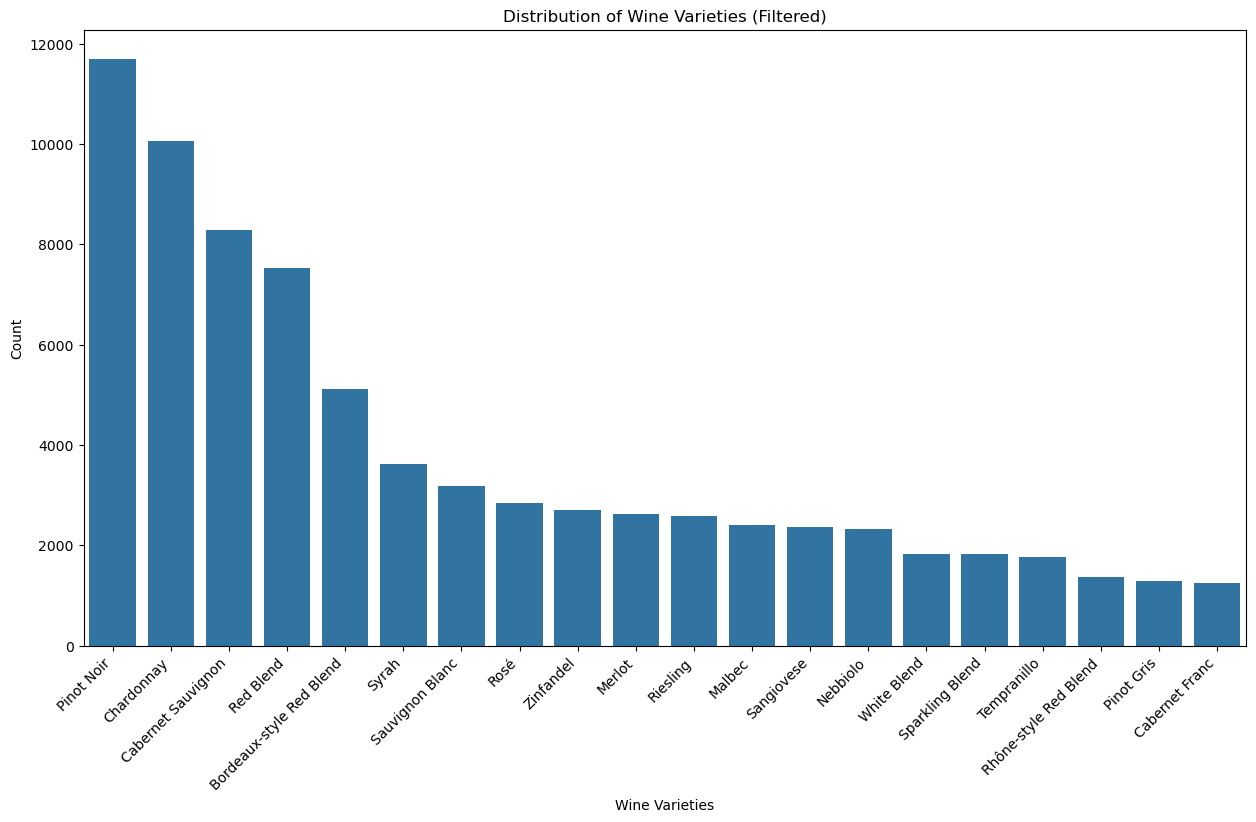

In [29]:
# Checking the distribution of the varieties after keeping only top 20 varieties
filtered_variety_counts = clean_wine_data['variety'].value_counts()

# Plot a bar plot with seaborn
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.barplot(x=filtered_variety_counts.index, y=filtered_variety_counts.values)

# Add labels and title
plt.xlabel("Wine Varieties")
plt.ylabel("Count")
plt.title("Distribution of Wine Varieties (Filtered)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment

# Show the plot
plt.show()

In [30]:
#Check how many are in the dataset now
print(clean_wine_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 76736 entries, 2 to 129969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   country          76736 non-null  object  
 1   description      76736 non-null  object  
 2   points           76736 non-null  int64   
 3   price            76736 non-null  int64   
 4   province         76736 non-null  object  
 5   region           76736 non-null  object  
 6   title            76736 non-null  object  
 7   variety          76736 non-null  object  
 8   winery           76736 non-null  object  
 9   rating_category  76736 non-null  category
dtypes: category(1), int64(2), object(7)
memory usage: 5.9+ MB
None


In [32]:
# Create a mapping of wine varieties into types
wine_type_mapping = {
    'Pinot Noir': 'Red',
    'Cabernet Sauvignon': 'Red',
    'Syrah': 'Red',
    'Zinfandel': 'Red',
    'Merlot': 'Red',
    'Malbec': 'Red',
    'Sangiovese': 'Red',
    'Nebbiolo': 'Red',
    'Tempranillo': 'Red',
    'Cabernet Franc': 'Red',
    
    'Chardonnay': 'White',
    'Sauvignon Blanc': 'White',
    'Riesling': 'White',
    'Pinot Gris': 'White',
    
    'Red Blend': 'Red Blend',
    'Bordeaux-style Red Blend': 'Red Blend',
    'Rhône-style Red Blend': 'Red Blend',

    'White Blend': 'White Blend',

    'Sparkling Blend': 'Sparkling',
}
# Create a copy of the DataFrame
clean_wine_data_final = clean_wine_data.copy()

# Create a new 'type' column by mapping 'variety' to 'wine_type_mapping'
clean_wine_data_final['type'] = clean_wine_data['variety'].map(wine_type_mapping)

# Display the DataFrame with the new 'type' column
print(clean_wine_data_final)

       country                                        description  points  \
2           US  Tart and snappy, the flavors of lime flesh and...      87   
3           US  Pineapple rind, lemon pith and orange blossom ...      87   
4           US  Much like the regular bottling from 2012, this...      87   
9       France  This has great depth of flavor with its fresh ...      87   
10          US  Soft, supple plum envelopes an oaky structure ...      87   
...        ...                                                ...     ...   
129952      US  This Zinfandel from the eastern section of Nap...      90   
129959  France  The granite soil of the Brand Grand Cru vineya...      90   
129965  France  While it's rich, this beautiful dry wine also ...      90   
129967      US  Citation is given as much as a decade of bottl...      90   
129969  France  A dry style of Pinot Gris, this is crisp with ...      90   

        price    province               region  \
2          14      Oregon

In [33]:
# save cleaned data
clean_wine_data_final.to_csv('clean_wine_data_final.csv', index=False)
clean_wine_data_final.to_json('clean_wine_data_final.json', orient='records')